In [1]:
import pandas as pd
import igraph as ig
from igraph import Graph
import matplotlib as plt
import json

In [490]:
edges = pd.read_csv("~/Downloads/Leng_2021_Edges.csv", header=0)
nodes = pd.read_csv("~/Downloads/Leng_2022_Nodes.csv", header=0)
WoS_Check = pd.read_csv("Paul_WoS_IDs.tsv", sep='\t')

In [343]:
WoS_Check = pd.Series(WoS_Check['UT'])
WoS_Check = WoS_Check.tolist()

In [344]:
check = []
for id in range(len(nodes)):
    if nodes['WoS_ID'].iloc[id] not in WoS_Check:
        check += [nodes['Id'].iloc[id]]

In [346]:
check.remove(1) # the paul paper shouldn't be in this list, it doesn't cite itself

In [73]:
for j in range(len(check)):
    nodes.drop(nodes.index[nodes['Id'] == check[j]], inplace=True)

In [491]:
nodes = nodes.drop(nodes[nodes.Citation_context == "Foreign"].index)

In [492]:
filter_nodes = []
for j in range(len(nodes)):
    filter_nodes += [nodes["Id"].iloc[j]]

edges_list = []
for i in range(len(edges)):
    if edges["Source"].iloc[i] in filter_nodes and edges["Target"].iloc[i] in filter_nodes:
            edges_list += [(edges["Source"].iloc[i], edges["Target"].iloc[i])]
edges = pd.DataFrame(edges_list, columns=["Source", "Target"])


In [352]:
print(len(edges))

1728


Since the nodes have been pre-filtered to exclude publications written in a language other than English, the set of edges also needs to reflect this change. 

This section can be used to create graphs year-by-year, e.g. all publications before 1965. 

In [497]:
nodes.iloc[0:16]

,Id,Label,Publication,V,P,DOI,Title,Publication_Year,Document_Type,WoS_ID,...,Diet_(D),Smoking_(S),Alcohol_(A),Physical_Activity_(PA),Body_Fatness_(BF),Indegree,Outdegree,Main_component,Cluster,Cluster_Name
0,1,PAUL O,CIRCULATION,V28,P20,10.1161/01.CIR.28.1.20,A LONGITUDINAL STUDY OF CORONARY HEART DISEASE,1963,Article,WOS:A19638848A00008,...,NaN,NaN,NaN,NaN,NaN,444,0,No,NaN,NaN
1,2,CHAPMAN JM,J CHRON DIS,V17,P933,10.1016/0021-9681(64)90163-8,INTERRELATIONSHIP OF SERUM CHOLESTEROL HYPERTE...,1964,Article,WOS:A19644339B00001,...,NaN,NaN,NaN,NaN,BF,82,1,Yes,0.0,Serum cholesterol and Unspecified CHD
2,3,YUDKIN J,LANCET,V2,P6,NaN,LEVELS OF DIETARY SUCROSE IN PATIENTS WITH OCC...,1964,Article,WOS:A19647822B00056,...,D,S,NaN,NaN,BF,31,1,Yes,2.0,Caffeine
3,4,OSTFELD AM,J CHRON DIS,V17,P265,10.1016/0021-9681(64)90154-7,PROSPECTIVE STUDY OF RELATIONSHIP BETWEEN PERS...,1964,Article,WOS:A19644342B00004,...,NaN,NaN,NaN,NaN,NaN,21,1,Yes,7.0,Psychosocial
4,5,KERSHBAUM A,JAMA-J AM MED ASSOC,V187,P32,NaN,CIGARETTE SMOKING + BLOOD LIPIDS,1964,Article,WOS:A19643432B00024,...,NaN,S,NaN,NaN,NaN,5,1,Yes,8.0,Smoking
5,6,BLISS HA,ARCH ENVIRON HEALTH,V9,P201,10.1080/00039896.1964.10663820,CALORIC EXPENDITURE AT 2 TYPES OF FACTORY WORK,1964,Article,WOS:A1964AU76700002,...,NaN,NaN,NaN,NaN,NaN,3,1,Yes,5.0,Physical activity
6,7,LOVELL RRH,BRIT MED J,V2,P465,10.1136/BMJ.2.5407.465,SOME SEQUELS TO MYOCARDIAL INFARCTION + THEIR ...,1964,Article,WOS:A19647793A00435,...,NaN,NaN,NaN,NaN,NaN,3,1,Yes,5.0,Physical activity
7,8,YUDKIN J,LANCET,V2,P478,NaN,DIETARY FAT + DIETARY SUGAR,1964,Letter,WOS:A19647823B00501,...,NaN,S,NaN,NaN,NaN,2,1,Yes,2.0,Caffeine
8,9,[ANONYMOUS],BMJ-BRIT MED J,V2,P703,NaN,WORK AFTER CORONARY,1964,Editorial Material,WOS:A19647794A00023,...,NaN,NaN,NaN,NaN,NaN,1,2,Yes,5.0,Physical activity
9,10,[ANONYMOUS],LANCET,V2,P628,NaN,CORONARY-ARTERY DISEASE IN YOUNG,1964,Editorial Material,WOS:A19647824B00002,...,D,NaN,NaN,NaN,NaN,0,1,No,NaN,NaN


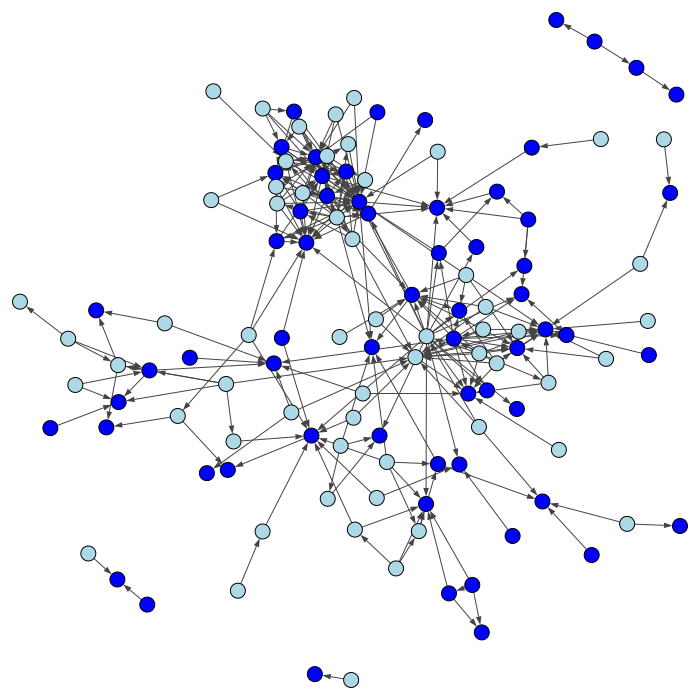

In [515]:
import unicodedata

for j in range(len(nodes)):
    if str(nodes["Cluster"].iloc[j]) == "nan":
        nodes.iat[j, -2] = 9
        nodes.iat[j, -1] = "Undefined"
    else:
        topic = unicodedata.normalize("NFKD", nodes.iat[j, -1])
        nodes.iat[j, -1] = topic

nodes = nodes.sort_values(['Cluster'])

filter_nodes = set()
for j in range(len(nodes)):
    year = nodes["Publication_Year"].iloc[j]
    if int(year) <= 1984 and int(year) > 1974 and nodes['Cluster'].iloc[j] != 9:
        filter_nodes.add(nodes["Id"].iloc[j])

edges_list = []
for i in range(len(edges)):
    if edges["Source"].iloc[i] in filter_nodes and edges['Target'].iloc[i] in filter_nodes:
        edges_list += [(edges["Source"].iloc[i], edges["Target"].iloc[i])]
edges_df = pd.DataFrame(edges_list, columns=["Source", "Target"])

label_list = []
for k in range(len(filter_nodes)+1):
    label_list += [k]

color = ["blue", 'lightblue', 'green', 'red', 'yellow', 'pink', 'orange', 'black', 'brown', 'white']
color_list = []

for k in range(len(nodes)):
    temp = int(nodes['Cluster'].iloc[k])
    color_list += [color[temp]]

g = Graph.DataFrame(edges_df)
ig.plot(g, bbox=(0, 0, 700, 700), vertex_size=15, vertex_color=color_list, edge_arrow_size=0.6)

In [132]:
for year in range(1964, 1985):
    filter_nodes = []
    for i in range(len(nodes)):
        filter_year = int(nodes["Publication_Year"].iloc[i])
        if filter_year <= year:
            filter_nodes += [nodes["Id"].iloc[i]]

    filter_edges = []
    for j in range(len(edges)):
        # filter out nodes based on year
        if edges["Source"].iloc[j] in filter_nodes: # and edges["Target"].ilog[j] != 1 can also be added to filter out Paul
            filter_edges += [(edges["Source"].iloc[j], edges["Target"].iloc[j])]

    edges_df = pd.DataFrame(filter_edges)

    """
    Each node in the filtered dataset needs to be assigned an integer id to be compliant 
    with Leiden algorithm input file requirements
    """

    # for each node kept, assign an integer index starting at 0
    selected_columns = edges_df
    temp = selected_columns.copy()
    temp = temp.stack().reset_index()
    node_list = temp[0].unique()

    node_index = {}
    node_count = len(node_list)
    for i in range(node_count):
        node_index[node_list[i]] = i

    edge_list = []
    # replace each doi with its integer index
    for j in range(len(edges_df)):
        edge = (edges_df[0].iloc[j], edges_df[1].iloc[j])
        edge_list += [(node_index.get(edge[0]), node_index.get(edge[1]))]

    non_dups = []
    for i in range(len(edge_list)):
        edge = edge_list[i]
        dup_check = (edge[1], edge[0])
        if dup_check not in edge_list:
            non_dups += [edge]


    network_df = pd.DataFrame(non_dups)

    network_df = network_df[[0, 1]]

    """
    Write filtered network to file
    """
    network_df.to_csv(f"Paul_network_{year}.tsv", sep="\t", index=False, header=False)

## Timeline

In [467]:
tl = pd.DataFrame(columns = ["fp_int_id", "cp_level", "cp_r_citing_zero", "cp_r_citing_nonzero", "tr_citing", "cp_r_cited_zero", "cp_r_cited_nonzero", "tr_cited"])
for year in range(1964, 1984): 
    temp = pd.read_csv(f"Timeline_Metrics/networkit_bdid-{year}.csv")
    tl = tl.append(temp.iloc[1:2])
    
years = []
for i in range(1964, 1985):
    years += [int(i)]
tl["year"] = years

/var/folders/wg/tyb0_yyn0tn7f5p4_vdb7dbh0000gn/T/ipykernel_1006/1772198730.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tl = tl.append(temp.iloc[1:2])
/var/folders/wg/tyb0_yyn0tn7f5p4_vdb7dbh0000gn/T/ipykernel_1006/1772198730.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tl = tl.append(temp.iloc[1:2])
/var/folders/wg/tyb0_yyn0tn7f5p4_vdb7dbh0000gn/T/ipykernel_1006/1772198730.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tl = tl.append(temp.iloc[1:2])
/var/folders/wg/tyb0_yyn0tn7f5p4_vdb7dbh0000gn/T/ipykernel_1006/1772198730.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tl = tl.append(temp.iloc[1:2])
/var/folders

In [146]:
tl = tl[["cp_level", "cp_r_citing_zero", "cp_r_citing_nonzero", "year"]]
tl = tl.rename(columns={"cp_level": "citation_count", "cp_r_citing_zero": "breadth", "cp_r_citing_nonzero": "depth"})

In [147]:
tl['depth ratio'] = tl.apply(lambda row: row.depth / row.citation_count, axis=1)
tl['breadth ratio'] = tl.apply(lambda row: row.breadth / row.citation_count, axis=1)


In [148]:
tl_bd = tl[["breadth ratio", "depth ratio", "year"]]

In [149]:
font = {'family' : 'normal',
        'size'   : 18}

plt.rc('font', **font)

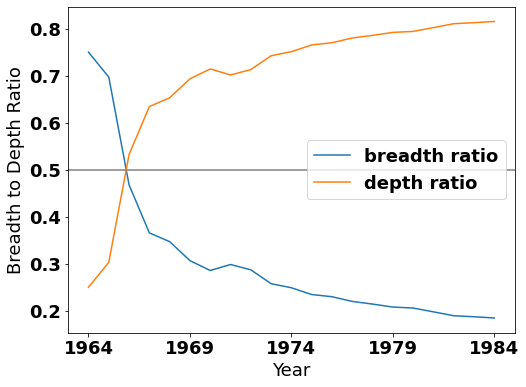

In [150]:
ax = tl_bd.plot(x="year", figsize=(8,6))
ax.set_ylabel("Breadth to Depth Ratio")
ax.set_xlabel("Year")
ax.axhline(y=0.5, color="grey")
ax.set_xticks([1964, 1969, 1974, 1979, 1984])

In [255]:
tl_bd

,breadth ratio,depth ratio,year
1,0.750000,0.250000,1964
1,0.696970,0.303030,1965
1,0.467742,0.532258,1966
1,0.365591,0.634409,1967
1,0.347107,0.652893,1968
1,0.306667,0.693333,1969
1,0.285714,0.714286,1970
1,0.298429,0.701571,1971
1,0.287129,0.712871,1972
1,0.257642,0.742358,1973


In [531]:
cite_count = tl[['citation_count', 'year']]

citations_per_year = [cite_count['citation_count'].iloc[0]]
for x in range(1, len(cite_count)):
    running_cite_count = cite_count['citation_count'].iloc[x]
    citations_this_year = running_cite_count - cite_count['citation_count'].iloc[x-1]
    citations_per_year += [citations_this_year]

cite_count_year = pd.DataFrame({'citations_per_year': citations_per_year, 'year' : cite_count['year']})
cite_count_year

KeyError: "None of [Index(['citation_count', 'year'], dtype='object')] are in the [columns]"

In [525]:
cite_count

,citation_count,year
1,16,1964
1,33,1965
1,62,1966
1,93,1967
1,121,1968
1,150,1969
1,168,1970
1,191,1971
1,202,1972
1,229,1973


(0.0, 35.0)

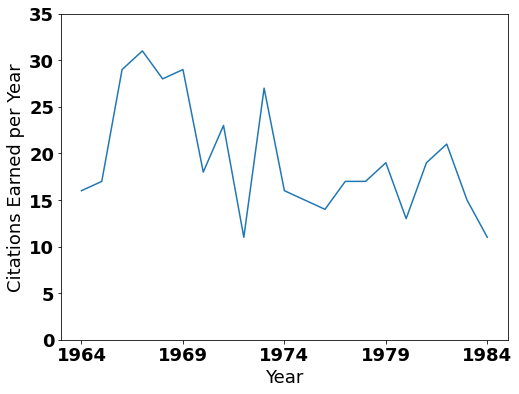

In [434]:
ax2 = cite_count_year.plot(x="year", figsize=(8, 6), legend=False)
ax2.set_xlabel("Year")
ax2.set_ylabel("Citations Earned per Year")
ax2.set_xticks([1964, 1969, 1974, 1979, 1984])
ax2.set_ylim(0, 35)

In [610]:
tl_compare = pd.read_csv('~/Downloads/kannel64.csv')

In [611]:
tl_compare = tl_compare.drop(tl_compare[tl_compare['Language'] != "English"].index)

In [612]:
tl_compare = tl_compare[['Article Title', 'Publication Year']]
tl_compare = tl_compare.groupby('Publication Year').count()
tl_compare = tl_compare.iloc[0:20]
tl_compare.to_csv('tl_compare.csv', header=0)

In [613]:
tl_compare = pd.read_csv('tl_compare.csv', header=None)

In [614]:
tl_compare = tl_compare.rename(columns={0: 'year', 1: 'count'})

In [615]:
tl_compare = tl_compare.append({'year': 1964, 'count': None}, ignore_index=True)

/var/folders/wg/tyb0_yyn0tn7f5p4_vdb7dbh0000gn/T/ipykernel_1006/2006557580.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tl_compare = tl_compare.append({'year': 1964, 'count': None}, ignore_index=True)


In [583]:
cite_count_year

,citations_per_year,year
1,16,1964
1,17,1965
1,29,1966
1,31,1967
1,28,1968
1,29,1969
1,18,1970
1,23,1971
1,11,1972
1,27,1973


In [616]:
import numpy as np
tl_compare['year'] = tl_compare['year'].apply(np.int64)

In [617]:
cite_compare = pd.merge(cite_count_year, tl_compare, how="inner", on=["year"])

In [618]:
cite_compare = cite_compare.rename(columns={"citations_per_year": 'Paul Citations', 'count': 'Kannel Citations'})

(0.0, 35.0)

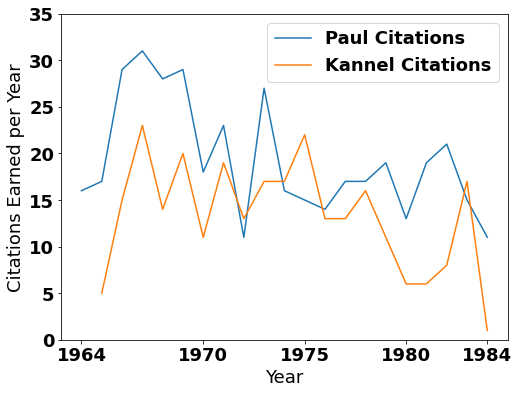

In [619]:
ax3 = cite_compare.plot(x="year", figsize=(8, 6))
ax3.set_xlabel("Year")
ax3.set_ylabel("Citations Earned per Year")
ax3.set_xticks([1964, 1970, 1975, 1980, 1984])
ax3.set_ylim(0, 35)


## JSON

In [451]:
nodes = nodes.reset_index()

In [452]:
nodes = nodes.rename(columns={"Label": "First_Author"})
nodes = nodes.sort_values("Id")

In [453]:
import unicodedata

for j in range(len(nodes)):
    if str(nodes["Cluster"].iloc[j]) == "nan":
        nodes.iat[j, -2] = 9
        nodes.iat[j, -1] = "Undefined"
    else:
        topic = unicodedata.normalize("NFKD", nodes.iat[j, -1])
        nodes.iat[j, -1] = topic

In [454]:
nodes

,index,Id,First_Author,Publication,V,P,DOI,Title,Publication_Year,Document_Type,...,Diet_(D),Smoking_(S),Alcohol_(A),Physical_Activity_(PA),Body_Fatness_(BF),Indegree,Outdegree,Main_component,Cluster,Cluster_Name
0,0,1,PAUL O,CIRCULATION,V28,P20,10.1161/01.CIR.28.1.20,A LONGITUDINAL STUDY OF CORONARY HEART DISEASE,1963,Article,...,NaN,NaN,NaN,NaN,NaN,444,0,No,9.0,Undefined
1,1,2,CHAPMAN JM,J CHRON DIS,V17,P933,10.1016/0021-9681(64)90163-8,INTERRELATIONSHIP OF SERUM CHOLESTEROL HYPERTE...,1964,Article,...,NaN,NaN,NaN,NaN,BF,82,1,Yes,0.0,Serum cholesterol and Unspecified CHD
2,2,3,YUDKIN J,LANCET,V2,P6,NaN,LEVELS OF DIETARY SUCROSE IN PATIENTS WITH OCC...,1964,Article,...,D,S,NaN,NaN,BF,31,1,Yes,2.0,Caffeine
3,3,4,OSTFELD AM,J CHRON DIS,V17,P265,10.1016/0021-9681(64)90154-7,PROSPECTIVE STUDY OF RELATIONSHIP BETWEEN PERS...,1964,Article,...,NaN,NaN,NaN,NaN,NaN,21,1,Yes,7.0,Psychosocial
4,4,5,KERSHBAUM A,JAMA-J AM MED ASSOC,V187,P32,NaN,CIGARETTE SMOKING + BLOOD LIPIDS,1964,Article,...,NaN,S,NaN,NaN,NaN,5,1,Yes,8.0,Smoking
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,439,442,SIMOPOULOS AP,ANN INTERN MED,V100,P285,10.7326/0003-4819-100-2-285,"BODY-WEIGHT, HEALTH, AND LONGEVITY",1984,Article,...,NaN,NaN,NaN,NaN,NaN,0,6,Yes,4.0,Body fatness and Unspecified CHD
403,440,443,VERNON SW,AM J EPIDEMIOL,V119,P99,10.1093/OXFORDJOURNALS.AJE.A113731,ETHNIC STATUS AND PARTICIPATION IN LONGITUDINA...,1984,Article,...,NaN,NaN,NaN,NaN,NaN,0,2,No,9.0,Undefined
404,441,444,ASHLEY MJ,RES ADV ALCOHOL DRUG,V8,P99,NaN,ALCOHOL-CONSUMPTION AND ISCHEMIC HEART-DISEASE...,1984,Article,...,NaN,NaN,NaN,NaN,NaN,0,22,Yes,6.0,Alcohol
405,442,445,KANNEL WB,AM J CARDIOL,V29,P154,10.1016/0002-9149(72)90624-8,NATURAL-HISTORY OF ANGINA-PECTORIS IN FRAMINGH...,1972,Article,...,NaN,NaN,NaN,NaN,NaN,5,1,Yes,1.0,Blood pressure and Unspecified CHD


In [457]:
json_nodes = []
filter_nodes = []
for i in range(len(nodes)):
    filter_year = int(nodes["Publication_Year"].iloc[i])
    if filter_year <= 1984 and filter_year > 1963:
        filter_nodes += [nodes["Id"].iloc[i]]
        json_nodes += [{"Id": str(nodes["Id"].iloc[i]), "First_Author" : nodes["First_Author"].iloc[i], 
                "Title" : nodes["Title"].iloc[i], "Publication_Year" : str(nodes["Publication_Year"].iloc[i]), 
                "Publication_Source": nodes["Publication"].iloc[i], "WoS_ID" : nodes["WoS_ID"].iloc[i], "Cluster" : nodes["Cluster"].iloc[i],
                "Topic": nodes['Cluster_Name'].iloc[i]}]

filter_edges = []
for j in range(len(edges)):
    # filter out nodes based on year
    if edges["Source"].iloc[j] in filter_nodes and edges['Target'].iloc[j] in filter_nodes: 
        filter_edges += [{"source": str(edges["Source"].iloc[j]), "target" : str(edges["Target"].iloc[j])}]

json_data = {"nodes" : json_nodes, "links" : filter_edges}

with open("Paul_total.json", "w") as outfile:
    json.dump(json_data, outfile)

## Clustering scratch pad


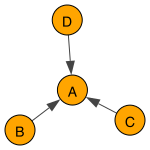

In [189]:
import igraph as ig
from igraph import Graph

g = Graph(directed=True)
g.add_vertices(["A", "B", "C", "D"])
g.add_edges([("B", "A"), ("C", "A"), ("D", "A")])
ig.plot(g, bbox=(0, 0, 150, 150), vertex_size=30, vertex_label=['A', 'B', 'C', 'D'], vertex_color=['orange'])

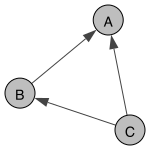

In [179]:
g_depth = Graph(directed=True)
g_depth.add_vertices(["A", "B", "C"])
g_depth.add_edges([("B", "A"), ("C", "B"), ("C", "A")])
ig.plot(g_depth, bbox=(0, 0, 150, 150), vertex_size=30, vertex_label=['A', 'B', 'C'], vertex_color=['gray'])

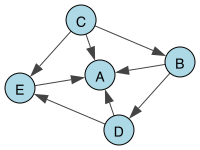

In [373]:
g_depth_2 = Graph(directed=True)
g_depth_2.add_vertices(["A", "B", "C", "D", "E"])
g_depth_2.add_edges([("C", "A"), ("C", "B"), ("B", "A"), ("B", "D"), ("D", "A"), ("D", "E"), ("E", "A"), ("C", "E")])
ig.plot(g_depth_2, bbox=(0, 0, 200, 150), vertex_size=30, vertex_label=['A', 'B', 'C', 'D', 'E'], vertex_color=['lightblue'])